### Imports

In [1]:
from lib.functions import model_size, lit_eval_csv_read, get_metrics
import torch

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


%load_ext autoreload
%autoreload 2
%reload_ext autoreload

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Paths

In [2]:
train_path='CSV_Data/segment_size_200/Training'
validation_path='CSV_Data/segment_size_200/Validation'
test_path='CSV_Data/segment_size_200/Performance Test'

### Tree and random forest 

#### Preprocessing

In [3]:
from lib.Preprocessing import preprocess_meta_data
threshold = 0.9
perm = 256

In [4]:
train_data_with_meta= preprocess_meta_data(dir_path=train_path,file_nbr=4,threshhold=threshold, permutations=perm)

############ Loading Data ############
CSV_Data/segment_size_200/Training/basic-V_8_8_P1-64.csv
############ Adding metadata ############
adding similarity index with a threshold of 0.9 and 256 permutations
############ Done ############


In [5]:
validation_data_with_meta= preprocess_meta_data(dir_path=validation_path,file_nbr=4,threshhold=threshold, permutations=perm)

############ Loading Data ############
CSV_Data/segment_size_200/Validation/basic-V_8_8_P1-64.csv
############ Adding metadata ############
adding similarity index with a threshold of 0.9 and 256 permutations
############ Done ############


In [6]:
test_data_with_meta= preprocess_meta_data(dir_path=test_path,file_nbr=4,threshhold=threshold, permutations=perm)

############ Loading Data ############
CSV_Data/segment_size_200/Performance Test/basic-V_8_8_P1-64.csv


############ Adding metadata ############
adding similarity index with a threshold of 0.9 and 256 permutations
############ Done ############


In [7]:
train_data_with_meta.class_count()

Positive class count : 1722, Negative class count : 28377


### Decision Tree and Random forest

In [8]:
x_train = train_data_with_meta.df.drop(['features','Label'],axis=1)
y_train = train_data_with_meta.df['Label']

In [9]:
x_validation = validation_data_with_meta.df.drop(['features','Label'],axis=1)
y_validation = validation_data_with_meta.df['Label']

#### Decision Tree

In [10]:
classifier = DecisionTreeClassifier(criterion="gini")

In [11]:
classifier.fit(x_train,y_train )

DecisionTreeClassifier()

##### Training

 Accuracy : 0.984251968503937 
 report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28773
           1       0.75      0.97      0.84      1326

    accuracy                           0.98     30099
   macro avg       0.87      0.98      0.92     30099
weighted avg       0.99      0.98      0.99     30099
  
[[28338    39]
 [  435  1287]]


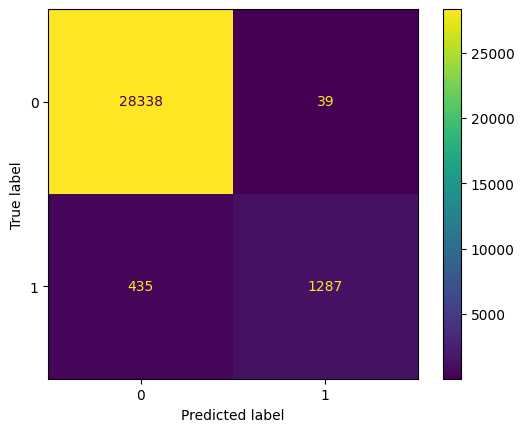

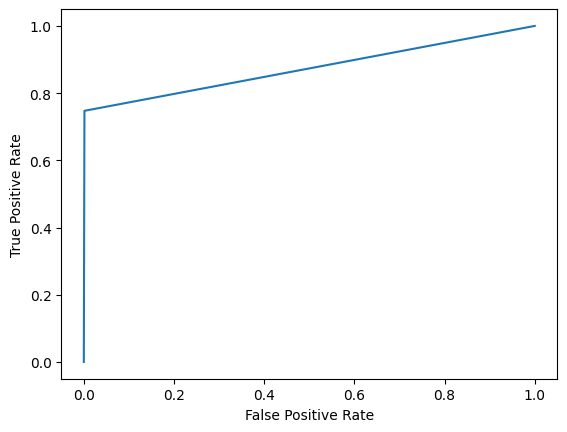

In [12]:
y_predict = classifier.predict(x_train)
get_metrics(y_train, y_predict)

##### Validation

 Accuracy : 0.9473684210526315 
 report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7164
           1       0.48      0.54      0.51       379

    accuracy                           0.95      7543
   macro avg       0.73      0.76      0.74      7543
weighted avg       0.95      0.95      0.95      7543
  
[[6940  173]
 [ 224  206]]


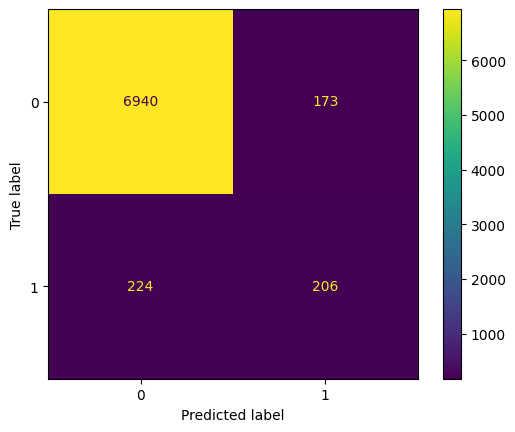

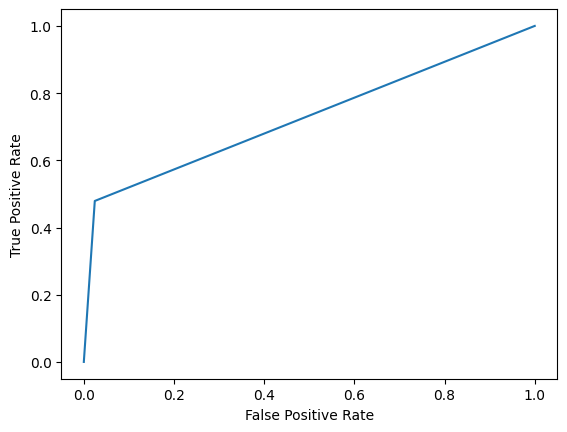

In [13]:
y_predict = classifier.predict(x_validation)
get_metrics(y_validation, y_predict)

#### Introducing weights

In [14]:
classifier = DecisionTreeClassifier(criterion="log_loss", class_weight={0:0.56, 1: 4.917})

##### Training

In [15]:
classifier.fit(x_train,y_train )

DecisionTreeClassifier(class_weight={0: 0.56, 1: 4.917}, criterion='log_loss')

 Accuracy : 0.9738861756204525 
 report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     27591
           1       1.00      0.69      0.81      2508

    accuracy                           0.97     30099
   macro avg       0.99      0.84      0.90     30099
weighted avg       0.97      0.97      0.97     30099
  
[[27591   786]
 [    0  1722]]


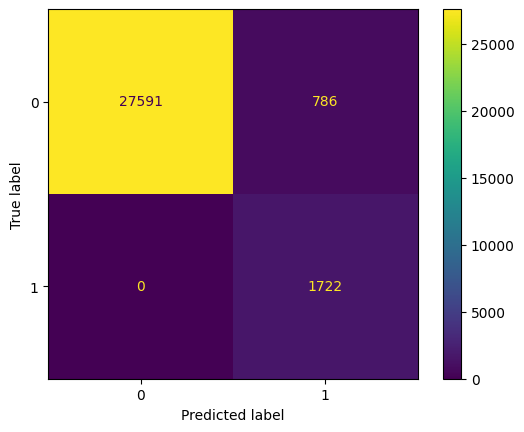

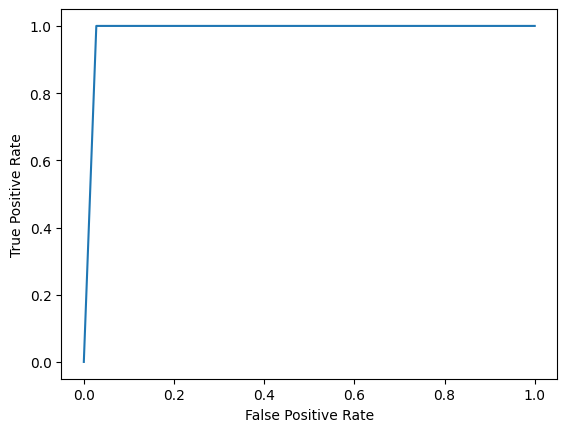

In [16]:
y_predict = classifier.predict(x_train)
get_metrics(y_train, y_predict)

##### Validation

 Accuracy : 0.9331830836537187 
 report : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6953
           1       0.60      0.44      0.51       590

    accuracy                           0.93      7543
   macro avg       0.78      0.71      0.74      7543
weighted avg       0.93      0.93      0.93      7543
  
[[6781  332]
 [ 172  258]]


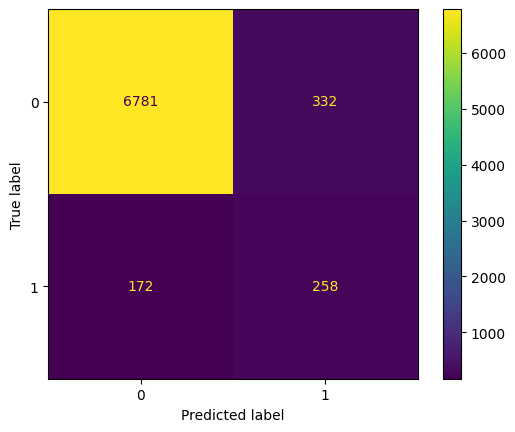

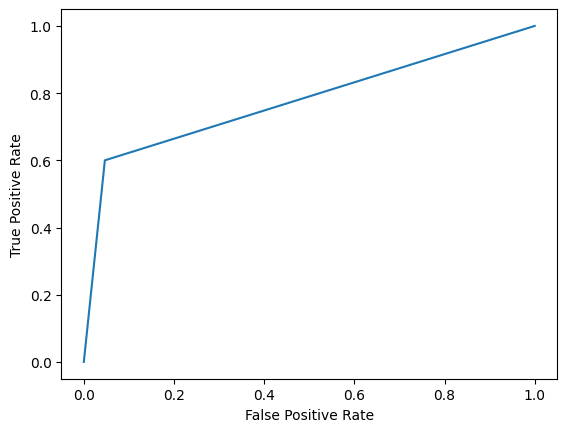

In [17]:
y_predict = classifier.predict(x_validation)
get_metrics(y_validation, y_predict)

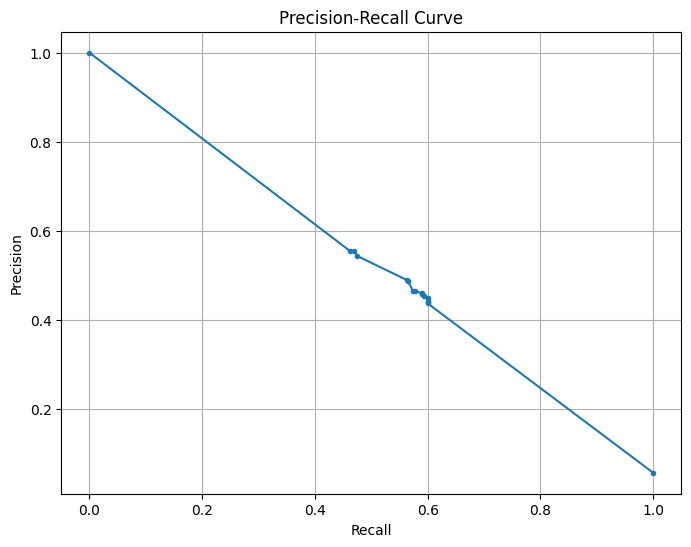

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba  = classifier.predict_proba(x_validation)[:,1]
precision, recall, thresholds = precision_recall_curve(y_validation, y_pred_proba)




plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


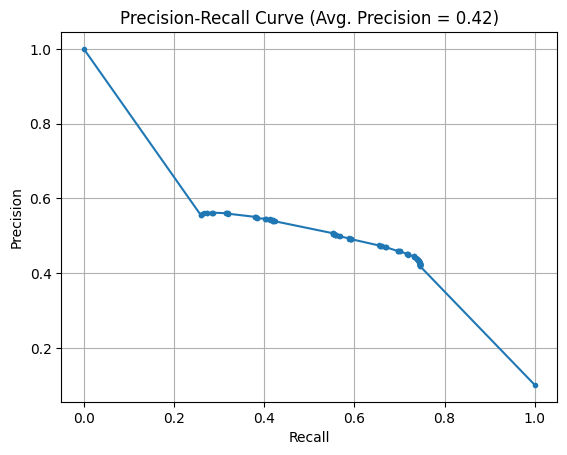

In [30]:
avg_precision = average_precision_score(y_validation, y_prediction)

# Plot the precision-recall curve
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Avg. Precision = {avg_precision:.2f})')
plt.grid(True)
plt.show()

In [23]:

chosen_threshold = 0.71
y_pred_adjusted = (y_prediction >= chosen_threshold).astype(int)

In [141]:
y_pred_adjusted

array([0, 0, 0, ..., 1, 0, 0])

 Accuracy : 0.8858974358974359 
 report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     26375
           1       0.70      0.46      0.55      4825

    accuracy                           0.89     31200
   macro avg       0.80      0.71      0.74     31200
weighted avg       0.87      0.89      0.88     31200
  
[[25429  2614]
 [  946  2211]]


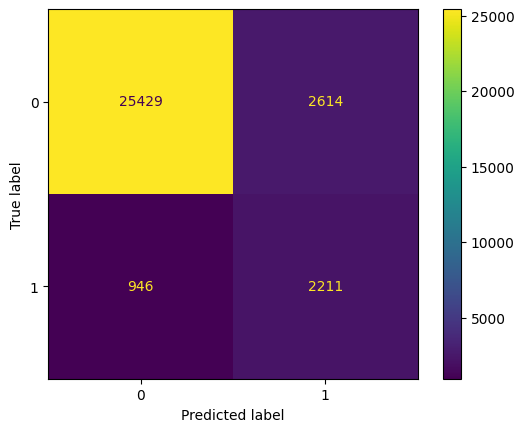

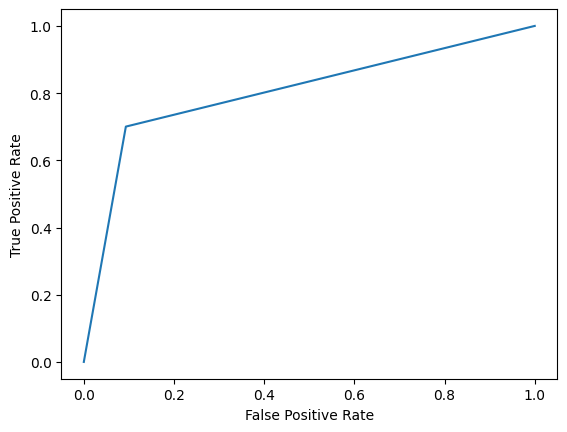

In [24]:
get_metrics(y_validation, y_pred_adjusted)

#### Random Forest

In [40]:
clf=RandomForestClassifier(class_weight={0:0.56, 1: 4.917}, criterion='gini', bootstrap=True, random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.56, 1: 4.917}, random_state=42)

 Accuracy : 0.9303027142387215 
 report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    104280
           1       0.96      0.60      0.74     20359

    accuracy                           0.93    124639
   macro avg       0.94      0.80      0.85    124639
weighted avg       0.93      0.93      0.92    124639
  
[[103768   8175]
 [   512  12184]]


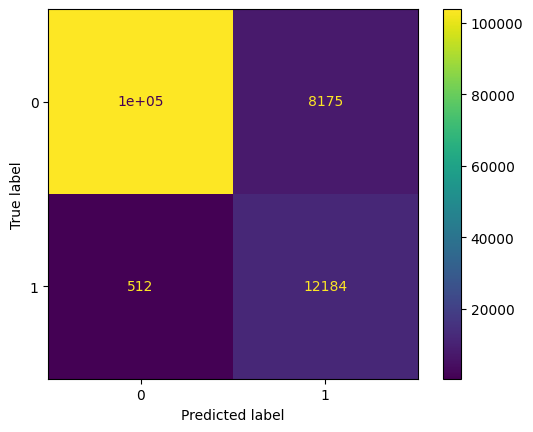

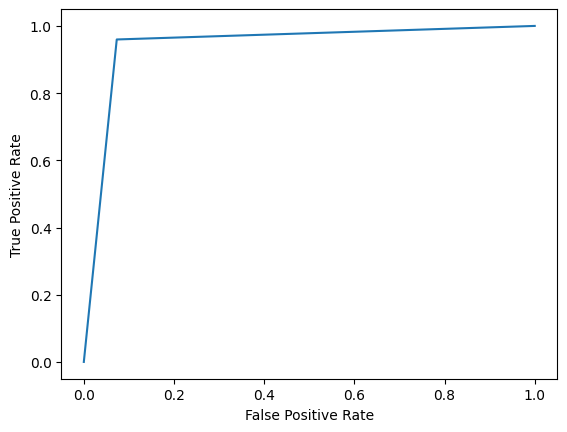

In [41]:
y_pred=clf.predict(x_train)
get_metrics(y_train, y_pred)

 Accuracy : 0.8869551282051282 
 report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     26404
           1       0.70      0.46      0.56      4796

    accuracy                           0.89     31200
   macro avg       0.80      0.71      0.75     31200
weighted avg       0.88      0.89      0.88     31200
  
[[25460  2583]
 [  944  2213]]


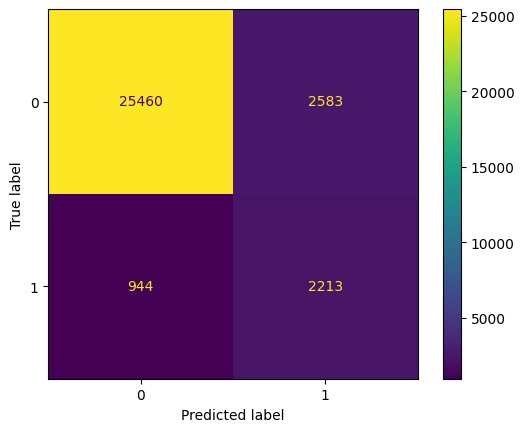

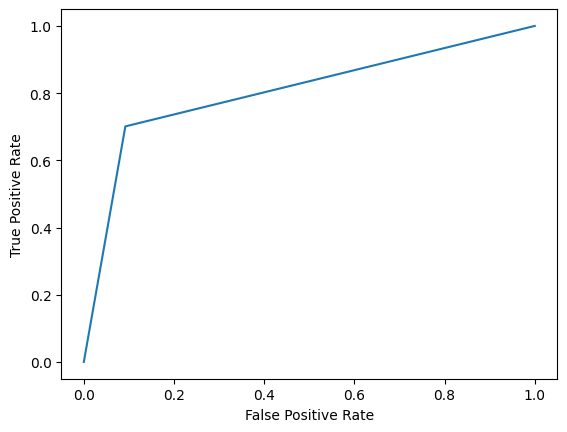

In [42]:
y_pred=clf.predict(x_validation)
get_metrics(y_validation, y_pred)